In [10]:
include("../code/headers.jl")
include("../code/bp.jl")
include("../code/seaweed.jl")
using ProgressMeter

## 1. Seaweeds

In [47]:
# mm = 66 * 2 .^(4:6)
mm = 66 * 2 .^(2:5)
meansizes_sw = zeros(length(mm))
sdsizes_sw = zeros(length(mm))
meansizes_lr = zeros(length(mm))
sdsizes_lr = zeros(length(mm))
navg = 10

R = 0.8/3
r = 1 - 3R
Λ = [0,1-r,r]
K = [0,0,1]
lambda,rho = nodes2edges(Λ,K)

([0.0, 0.7272727272727273, 0.27272727272727265], [0.0, 0.0, 1.0])

In [48]:
for (i,m) in enumerate(mm)  
    nedges = 3m
    n = round(Int, 3m/(2+r))
    @show b = round(Int,sqrt(n)*4)
    sw_size = zeros(navg)
    lr_size = zeros(navg)
    @showprogress for j in 1:navg
        fg = ldpc_graphGF2(n,m,nedges,lambda,rho, accept_multiedges=false)
        breduction!(fg, b)
        B_lr, _ = findbasis(fg.H)
        lr_size[j] = maximum(sum(B_lr,dims=1))
        dim = size(B_lr,2)
        Baux = sparse(falses(fg.n,dim))  # pre-allocate for speed
        B_sw, _ = seaweed_basis(5*fg.n, fg, dim, Baux)
        sw_size[j] = maximum(sum(B_sw,dims=1))
    end
    meansizes_sw[i] = mean(sw_size)
    sdsizes_sw[i] = std(sw_size)/sqrt(navg)
    meansizes_lr[i] = mean(lr_size)
    sdsizes_lr[i] = std(lr_size)/sqrt(navg)
    println("m=$m finished. $i of ", length(mm))
end

b = round(Int, sqrt(n) * 4) = 76


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


m=264 finished. 1 of 4
b = round(Int, sqrt(n) * 4) = 107


Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:39


m=528 finished. 2 of 4
b = round(Int, sqrt(n) * 4) = 152


Progress: 100%|█████████████████████████████████████████| Time: 0:00:42
Progress: 100%|█████████████████████████████████████████| Time: 0:00:39
Progress: 100%|█████████████████████████████████████████| Time: 0:00:44
Progress: 100%|█████████████████████████████████████████| Time: 0:00:45
Progress: 100%|█████████████████████████████████████████| Time: 0:00:41
Progress: 100%|█████████████████████████████████████████| Time: 0:00:39
Progress: 100%|█████████████████████████████████████████| Time: 0:00:39
Progress: 100%|█████████████████████████████████████████| Time: 0:00:39
Progress: 100%|█████████████████████████████████████████| Time: 0:00:38
Progress: 100%|█████████████████████████████████████████| Time: 0:00:36
Progress: 100%|█████████████████████████████████████████| Time: 0:06:46


m=1056 finished. 3 of 4
b = round(Int, sqrt(n) * 4) = 215


Progress: 100%|█████████████████████████████████████████| Time: 0:07:42
Progress: 100%|█████████████████████████████████████████| Time: 0:07:18
Progress: 100%|█████████████████████████████████████████| Time: 0:07:45
Progress: 100%|█████████████████████████████████████████| Time: 0:07:26
Progress: 100%|█████████████████████████████████████████| Time: 0:08:00
Progress: 100%|█████████████████████████████████████████| Time: 0:08:23
Progress: 100%|█████████████████████████████████████████| Time: 0:07:07
Progress:   7%|███                                      |  ETA: 0:31:19IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Progress: 100%|█████████████████████████████████████████| Time: 0:08:54
Progress: 100%|█████████████

m=2112 finished. 4 of 4


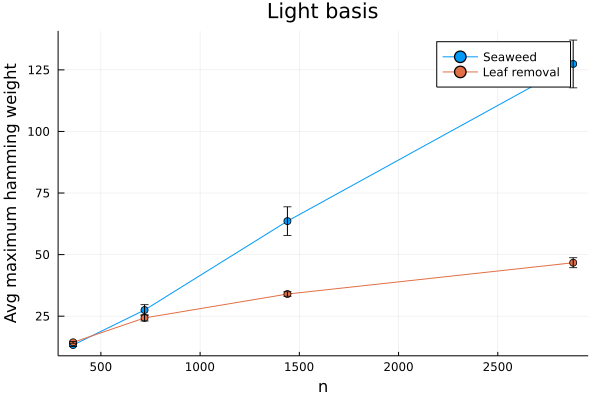

In [50]:
nn = [round(Int, 3m/(2+r)) for m in mm]
plot(nn, meansizes_sw, marker=:circle, yerr=sdsizes_sw, label="Seaweed")
plot!(nn, meansizes_lr, marker=:circle, yerr=sdsizes_lr, label="Leaf removal")
xlabel!("n"); ylabel!("Avg maximum hamming weight")
title!("Light basis")

## Only leaf removal

In [73]:
mm = 66 * 2 .^(2:8)
meansizes = zeros(length(mm))
sdsizes = zeros(length(mm))
navg = 50

R = 0.8/3
r = 1 - 3R
Λ = [0,1-r,r]
K = [0,0,1]
lambda,rho = nodes2edges(Λ,K)

([0.0, 0.7272727272727273, 0.27272727272727265], [0.0, 0.0, 1.0])

In [76]:
for (i,m) in enumerate(mm)  
    nedges = 3m
    n = round(Int, 3m/(2+r))
    @show b = round(Int,2*sqrt(n))
    lr_size = zeros(navg)
    @showprogress for j in 1:navg
        fg = ldpc_graphGF2(n,m,nedges,lambda,rho, accept_multiedges=false)
        breduction!(fg, b)
        B_lr, _ = findbasis(fg.H)
        lr_size[j] = maximum(sum(B_lr,dims=1))
    end
    meansizes[i] = mean(lr_size)
    sdsizes[i] = std(lr_size)/sqrt(navg)
    println("m=$m finished. $i of ", length(mm))
end

b = round(Int, 2 * sqrt(n)) = 38


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


m=264 finished. 1 of 7
b = round(Int, 2 * sqrt(n)) = 54


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


m=528 finished. 2 of 7
b = round(Int, 2 * sqrt(n)) = 76


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


m=1056 finished. 3 of 7
b = round(Int, 2 * sqrt(n)) = 107


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


m=2112 finished. 4 of 7
b = round(Int, 2 * sqrt(n)) = 152


Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


m=4224 finished. 5 of 7
b = round(Int, 2 * sqrt(n)) = 215


Progress: 100%|█████████████████████████████████████████| Time: 0:01:42


m=8448 finished. 6 of 7
b = round(Int, 2 * sqrt(n)) = 304


Progress: 100%|█████████████████████████████████████████| Time: 0:08:00


m=16896 finished. 7 of 7


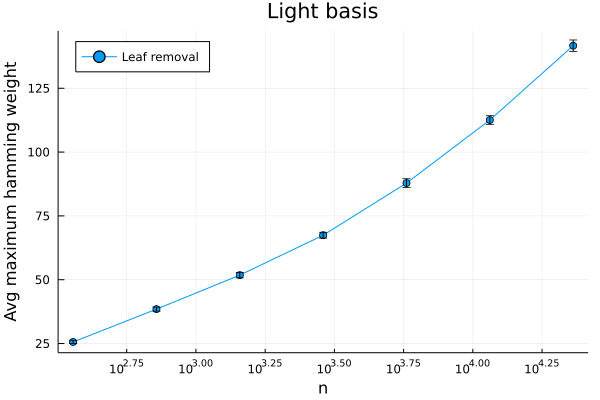

In [78]:
nn = [round(Int, 3m/(2+r)) for m in mm]
plot(nn, meansizes, marker=:circle, yerr=sdsizes, label="Leaf removal", xscale=:log10)
xlabel!("n"); ylabel!("Avg maximum hamming weight")
title!("Light basis")
plot!(legend=:topleft)